# Module 3

# Loading Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker

%matplotlib inline

# Reading data and preprocessing

In [3]:
df = pd.read_csv('swapLiborData.csv')

#convert number to datatime format
for i in range(df.shape[0]):
    df.loc[i,'Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df.loc[i,'Date'],'D')
    
df.head(5)

,Date,US0001M,US0002M,US0003M,US0006M,US0012M,USSW2,USSW3,USSW5,USSW7,USSW10,USSW15,USSW30
0,2014-01-02 00:00:00,0.1683,0.21250,0.24285,0.3464,0.5826,0.4903,0.8705,1.7740,2.4540,3.0610,3.5613,3.8950
1,2014-01-03 00:00:00,0.1647,0.20995,0.23985,0.3452,0.5846,0.5113,0.9000,1.7920,2.4648,3.0665,3.5635,3.8953
2,2014-01-06 00:00:00,0.1625,0.20825,0.23935,0.3445,0.5854,0.5000,0.8760,1.7468,2.4203,3.0260,3.5315,3.8738
3,2014-01-07 00:00:00,0.1615,0.20820,0.24210,0.3447,0.5866,0.4985,0.8735,1.7375,2.4065,3.0098,3.5145,3.8580
4,2014-01-08 00:00:00,0.1610,0.20750,0.24040,0.3452,0.5856,0.5350,0.9520,1.8280,2.4835,3.0650,3.5500,3.8703


# LIBOR Curves

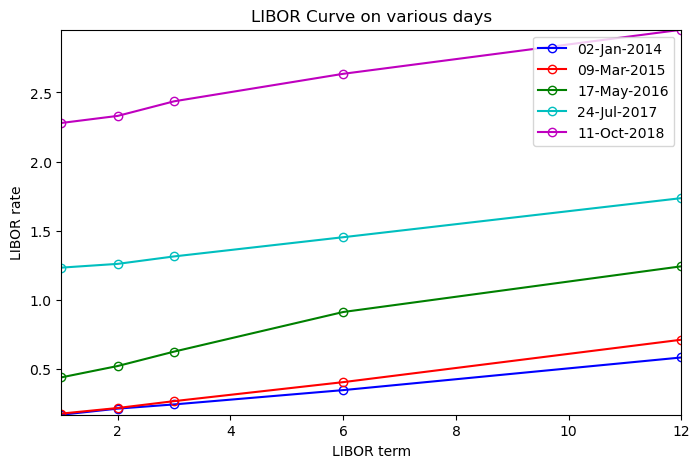

In [6]:
#plot data
plt.figure(figsize=(8,5)) # set the figure size
plt.plot([1, 2, 3, 6 ,12], df.iloc[0,1:6], 'bo-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[299,1:6], 'ro-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[599,1:6], 'go-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[899,1:6], 'co-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[-1,1:6], 'mo-', markerfacecolor='None')

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('LIBOR term')
plt.ylabel('LIBOR rate')
plt.title('LIBOR Curve on various days')

plt.legend(labels = [df.iloc[0,0].strftime('%d-%b-%Y'), \
                     df.iloc[299,0].strftime('%d-%b-%Y'), \
                     df.iloc[599,0].strftime('%d-%b-%Y'), \
                     df.iloc[899,0].strftime('%d-%b-%Y'), \
                     df.iloc[-1,0].strftime('%d-%b-%Y'), \
                     ], loc='best')

plt.show()

# Market LIBOR Rates

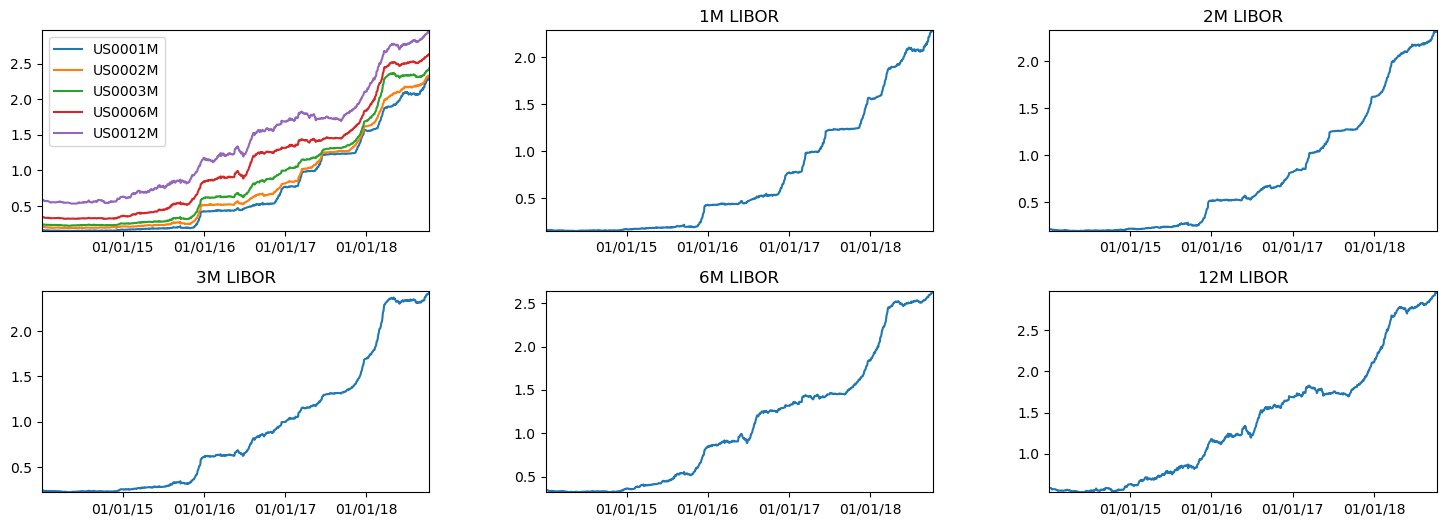

In [7]:
plt.figure(figsize=(18,6)) # set the figure size

for i in range(0,6):
    
    if i == 0:
        #plot data
        plt.subplot(2,3,1)
        plt.plot(df.iloc[:,0], df.iloc[:,1])
        plt.plot(df.iloc[:,0], df.iloc[:,2])
        plt.plot(df.iloc[:,0], df.iloc[:,3])
        plt.plot(df.iloc[:,0], df.iloc[:,4])
        plt.plot(df.iloc[:,0], df.iloc[:,5])
        
        #adjust display setting
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.xticks(rotation='horizontal',horizontalalignment='center')
        
        plt.legend(labels = ['US0001M','US0002M','US0003M','US0006M','US0012M'], loc='best')   
    
    else:
        plt.subplot(2,3,i+1)
        plt.plot(df.iloc[:,0], df.iloc[:,i])  
        
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
        plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
        plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
        plt.xticks(rotation='horizontal',horizontalalignment='center')   
        
        if i == 1:
            liborM = 1
        elif i == 2:
            liborM = 2
        elif i == 3:
            liborM = 3
        elif i == 4:
            liborM = 6
        elif i == 5:
            liborM = 12
            
        plt.title(str(liborM)+'M LIBOR')

wspace = 0.3   # the amount of width reserved for space between subplots,
                     # expressed as a fraction of the average axis width
        
hspace = 0.3   # the amount of height reserved for space between subplots,
                      # expressed as a fraction of the average axis height             

plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.show()

# Q-Q plot (from Jan 2, 2014 to May 24, 2016)

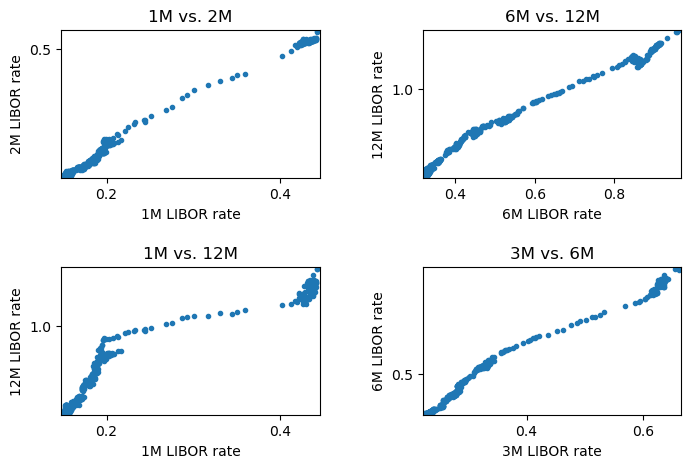

In [8]:
len1 = len(df)

t1 = 0
t2 = int(np.ceil(len1/2))

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,2], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('2M LIBOR rate')
plt.title('1M vs. 2M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,4], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('6M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('6M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('1M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,3], df.iloc[t1:t2,4], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('3M LIBOR rate')
plt.ylabel('6M LIBOR rate')
plt.title('3M vs. 6M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from May 25, 2016 to Oct 11, 2018)

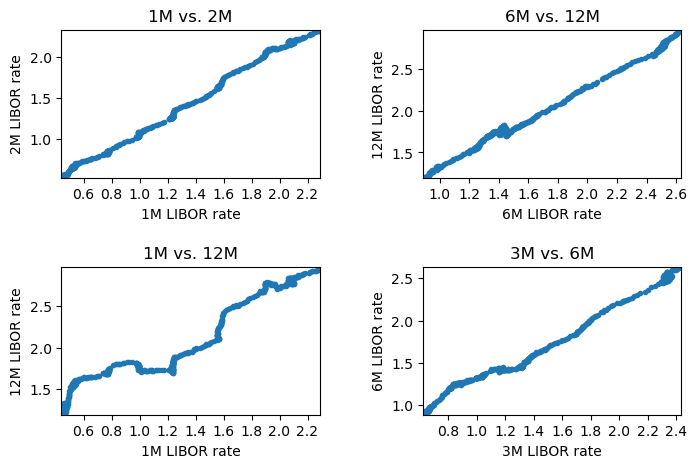

In [9]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,2], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('2M LIBOR rate')
plt.title('1M vs. 2M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,4], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('6M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('6M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('1M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,3], df.iloc[t1:t2,4], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('3M LIBOR rate')
plt.ylabel('6M LIBOR rate')
plt.title('3M vs. 6M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from Jan 2, 2014 to Oct 11, 2018)

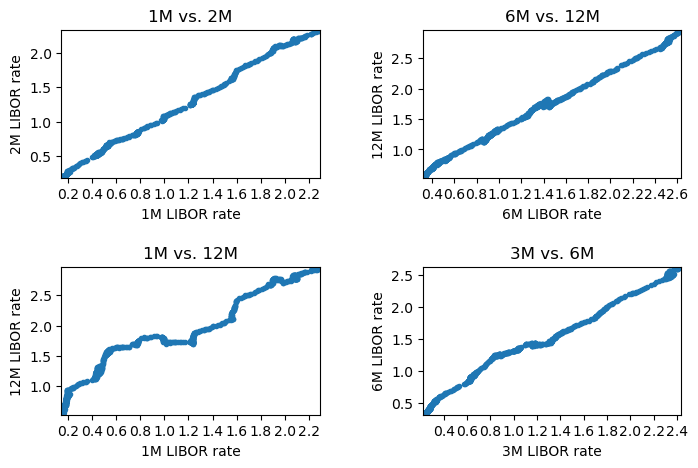

In [10]:
len1 = len(df)

t1 = 0
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,2], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('2M LIBOR rate')
plt.title('1M vs. 2M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,4], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('6M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('6M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('1M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,3], df.iloc[t1:t2,4], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('3M LIBOR rate')
plt.ylabel('6M LIBOR rate')
plt.title('3M vs. 6M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Swap Curves

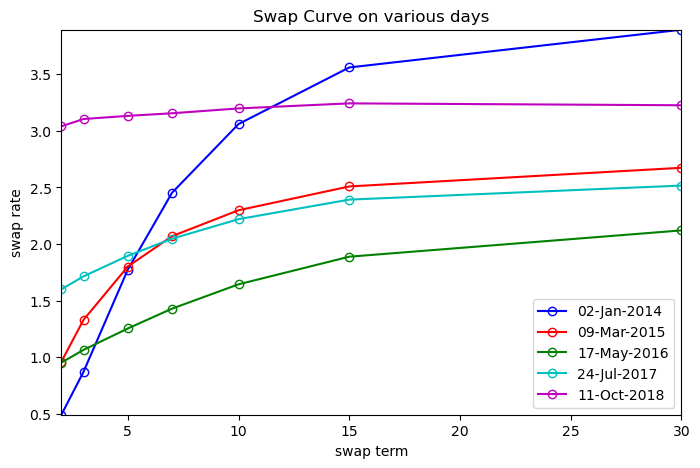

In [11]:
#plot data
plt.figure(figsize=(8,5)) # set the figure size
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[0,6:13], 'bo-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[299,6:13], 'ro-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[599,6:13], 'go-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[899,6:13], 'co-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[-1,6:13], 'mo-', markerfacecolor='None')

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('swap term')
plt.ylabel('swap rate')
plt.title('Swap Curve on various days')

plt.legend(labels = [df.iloc[0,0].strftime('%d-%b-%Y'), \
                     df.iloc[299,0].strftime('%d-%b-%Y'), \
                     df.iloc[599,0].strftime('%d-%b-%Y'), \
                     df.iloc[899,0].strftime('%d-%b-%Y'), \
                     df.iloc[-1,0].strftime('%d-%b-%Y'), \
                     ], loc='best')

plt.show()

# Market Swap Rates (from Jan 2, 2014 to Oct 11, 2018)

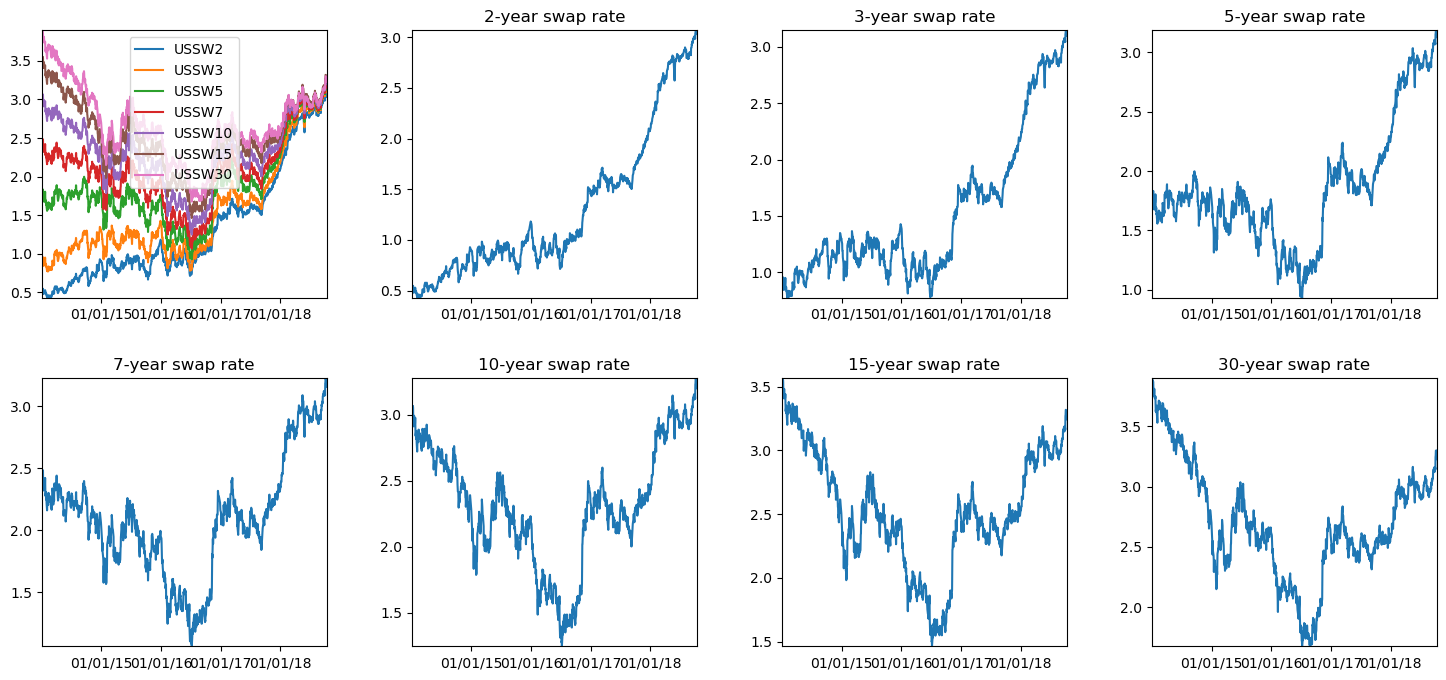

In [14]:
plt.figure(figsize=(18,8)) # set the figure size

for i in range(0,8):
    
    if i == 0:
        #plot data
        plt.subplot(2,4,1)
        plt.plot(df.iloc[:,0], df.iloc[:,6])
        plt.plot(df.iloc[:,0], df.iloc[:,7])
        plt.plot(df.iloc[:,0], df.iloc[:,8])
        plt.plot(df.iloc[:,0], df.iloc[:,9])
        plt.plot(df.iloc[:,0], df.iloc[:,10])
        plt.plot(df.iloc[:,0], df.iloc[:,11])
        plt.plot(df.iloc[:,0], df.iloc[:,12])
        
        #adjust display setting
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.xticks(rotation='horizontal',horizontalalignment='center')
        
        plt.legend(labels = ['USSW2','USSW3','USSW5','USSW7','USSW10','USSW15','USSW30'], loc='best')   
    
    else:
        plt.subplot(2,4,i+1)
        plt.plot(df.iloc[:,0], df.iloc[:,i+5])  
        
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
        plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
        plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
        plt.xticks(rotation='horizontal',horizontalalignment='center')   
        
        if i == 1:
            swapYr = 2
        elif i == 2:
            swapYr = 3
        elif i == 3:
            swapYr = 5
        elif i == 4:
            swapYr = 7
        elif i == 5:
            swapYr = 10
        elif i == 6:
            swapYr = 15
        elif i == 7:
            swapYr = 30
            
        plt.title(str(swapYr)+'-year swap rate')

wspace = 0.3   # the amount of width reserved for space between subplots,
                     # expressed as a fraction of the average axis width
        
hspace = 0.3   # the amount of height reserved for space between subplots,
                      # expressed as a fraction of the average axis height             

plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.show()

# Q-Q plot (from Jan 2, 2014 to May 24, 2016)

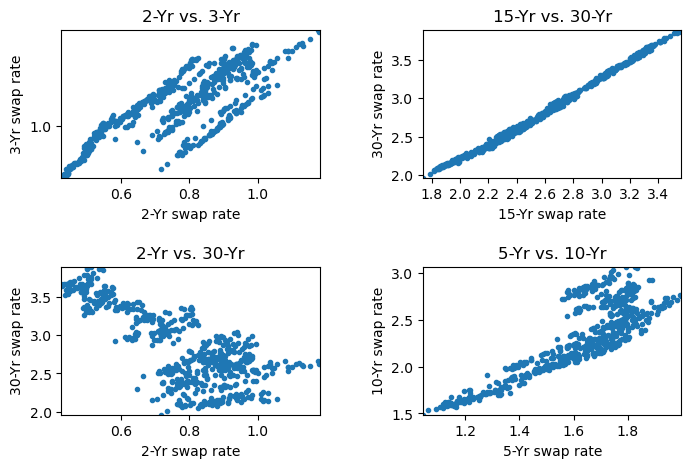

In [15]:
len1 = len(df)

t1 = 1
t2 = int(np.ceil(len1/2))

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,7], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('3-Yr swap rate')
plt.title('2-Yr vs. 3-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,11], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('15-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('15-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('2-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,8], df.iloc[t1:t2,10], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('5-Yr swap rate')
plt.ylabel('10-Yr swap rate')
plt.title('5-Yr vs. 10-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from May 25, 2016 to Oct 11, 2018)

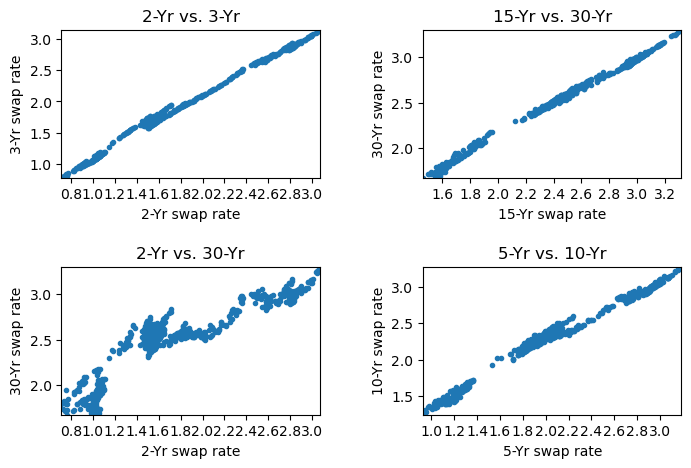

In [16]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,7], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('3-Yr swap rate')
plt.title('2-Yr vs. 3-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,11], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('15-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('15-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('2-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,8], df.iloc[t1:t2,10], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('5-Yr swap rate')
plt.ylabel('10-Yr swap rate')
plt.title('5-Yr vs. 10-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from Jan 2, 2014 to Oct 11, 2018)

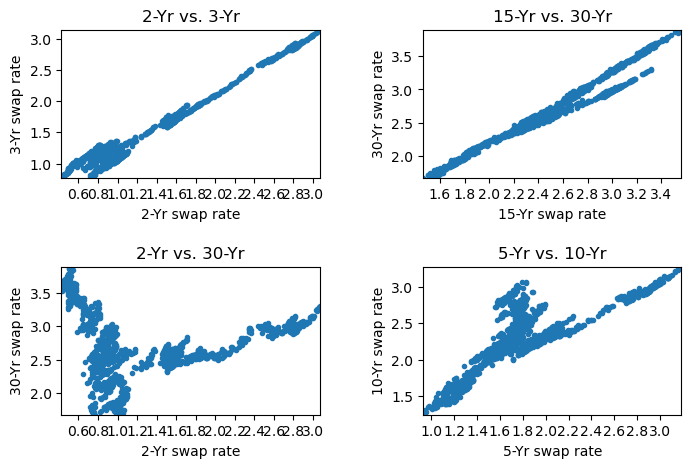

In [17]:
len1 = len(df)

t1 = 1
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,7], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('3-Yr swap rate')
plt.title('2-Yr vs. 3-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,11], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('15-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('15-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('2-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,8], df.iloc[t1:t2,10], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('5-Yr swap rate')
plt.ylabel('10-Yr swap rate')
plt.title('5-Yr vs. 10-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()